<a href="https://colab.research.google.com/github/SidharrthSingh25/ML/blob/master/ASSIGNMENT_6/Kernel_SVM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. DATA PREPROCESSING

1.1 IMPORTING LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.2 IMPORTING DATASETS

In [3]:
dataset = pd.read_csv ('pulsar_stars.csv')
X = dataset.iloc [ : , :-1].values
Y = dataset.iloc [ : ,-1].values

1.3 SPLITTING INTO TRAINING AND TEST SET

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25, random_state = 0)

In [5]:
print (X_train)

[[ 1.33898438e+02  4.69297746e+01  3.87951750e-02 ...  1.95615370e+01
   8.57437793e+00  8.07954514e+01]
 [ 2.70390625e+01  3.37547224e+01  4.77912374e+00 ...  7.88154399e+01
  -3.48492115e-01 -8.93790697e-01]
 [ 1.07718750e+02  5.20618529e+01  2.78869299e-01 ...  4.05191430e+01
   3.34724977e+00  1.04413225e+01]
 ...
 [ 1.33164062e+02  5.54754700e+01 -9.44232330e-02 ...  1.26535027e+01
   1.21759792e+01  1.81458434e+02]
 [ 9.81718750e+01  4.88055948e+01  3.11807442e-01 ...  1.62043130e+01
   1.02032095e+01  1.22776632e+02]
 [ 1.06046875e+02  4.20750556e+01  4.21143692e-01 ...  1.99249204e+01
   7.31348277e+00  5.87921276e+01]]


In [6]:
print (Y_train)

[0 1 0 ... 0 0 0]


In [7]:
print (X_test)

[[ 1.02289062e+02  4.57590757e+01  2.31697754e-01 ...  1.43430197e+01
   9.50036830e+00  1.17057724e+02]
 [ 1.20093750e+02  5.17653114e+01  1.52884958e-01 ...  1.96742682e+01
   7.96200404e+00  7.36250634e+01]
 [ 1.08820312e+02  5.80159506e+01  3.96478925e-01 ...  1.94694241e+01
   9.30173415e+00  9.46556370e+01]
 ...
 [ 1.24601562e+02  4.96176537e+01 -7.67909800e-03 ...  1.54960315e+01
   8.04710053e+00  8.64405361e+01]
 [ 1.02046875e+02  4.87905055e+01  4.52226380e-01 ...  1.39284014e+01
   9.12749945e+00  1.16023222e+02]
 [ 1.16679688e+02  4.74069704e+01  6.94263630e-02 ...  8.26920169e+01
  -1.92942742e-01 -1.87714766e+00]]


In [8]:
print (Y_test)

[0 0 0 ... 0 0 0]


1.4 FEATURE SCALING

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler ()
X_train = sc_X.fit_transform (X_train)
X_test = sc_X.transform (X_test)

In [10]:
print (X_train)

[[ 0.89035     0.05299446 -0.41627838 ... -0.35147554  0.06520135
  -0.22396846]
 [-3.24056646 -1.87170607  3.9915008  ...  2.67629293 -1.9123934
  -0.99480636]
 [-0.12169131  0.80272308 -0.19304623 ...  0.71942064 -1.09329823
  -0.88784571]
 ...
 [ 0.8619609   1.30140731 -0.54015109 ... -0.70446375  0.86343194
   0.7259099 ]
 [-0.49074965  0.32702693 -0.16241881 ... -0.52302369  0.42620276
   0.17217532]
 [-0.18632182 -0.65621566 -0.06075285 ... -0.33290731 -0.21425354
  -0.43159673]]


In [11]:
print (X_test)

[[-0.33158946 -0.11802914 -0.23690854 ... -0.61813245  0.27043057
   0.11821043]
 [ 0.35669527  0.7594023  -0.31019236 ... -0.34571518 -0.07052038
  -0.29162984]
 [-0.07910766  1.67253786 -0.0836873  ... -0.35618235  0.22640686
  -0.09318065]
 ...
 [ 0.53095604  0.44565798 -0.45949233 ... -0.55921561 -0.05166027
  -0.17070018]
 [-0.34095183  0.32482259 -0.03185071 ... -0.6393187   0.18779085
   0.10844865]
 [ 0.22471615  0.12270643 -0.38779607 ...  2.87437909 -1.87791866
  -1.00408554]]


## 2. KERNEL SVM MODEL

2.1 TRAINING KERNEL SVM MODEL ON TRAINING SET

In [12]:
from sklearn.svm import SVC
classifier = SVC (kernel = 'rbf', random_state = 0)
classifier.fit (X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

2.2 PREDICTING NEW RESULT 

In [13]:
print (classifier.predict (sc_X.transform ([[140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,]])))

[0]


2.3 PREDICTING TEST SET RESULTS

In [14]:
Y_pred = classifier.predict (X_test)
print (np.concatenate ((Y_pred.reshape (len (Y_pred),1), Y_test.reshape (len (Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


2.4 MODEL ACCURACY

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix (Y_test, Y_pred)
print (cm)
acc = accuracy_score (Y_test, Y_pred)
print ('MODEL ACCURACY is - ' + str (acc*100) + '%')

[[4093   22]
 [  63  297]]
MODEL ACCURACY is - 98.10055865921787%


## 3. VISUALISING TEST SET RESULTS

In [16]:
X_test = sc_X.inverse_transform (X_test)

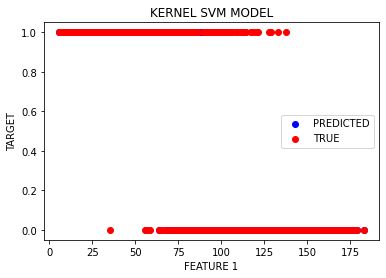

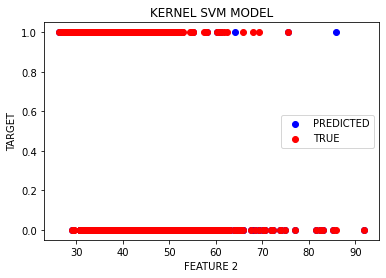

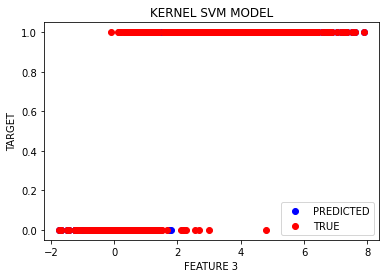

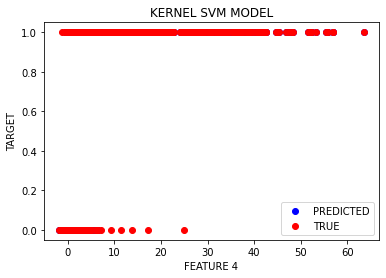

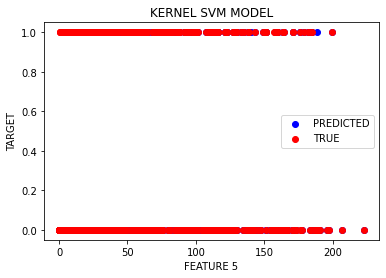

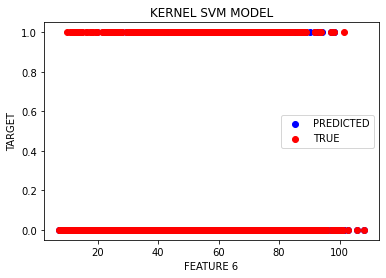

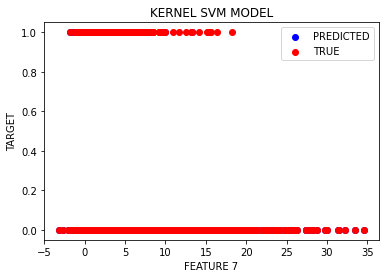

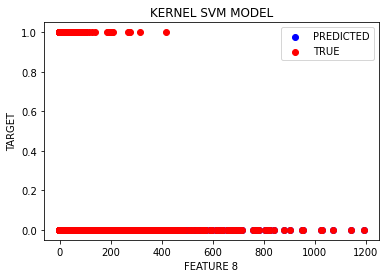

In [17]:
for i in range (8):
  plt.figure ()
  plt.scatter (X_test [ : ,i], Y_pred, color = 'blue', label = 'PREDICTED')
  plt.scatter (X_test [ : ,i], Y_test, color = 'red', label = 'TRUE')
  plt.title ('KERNEL SVM MODEL')
  plt.xlabel ('FEATURE ' + str (i+1))
  plt.ylabel ('TARGET')
  plt.legend ()
  plt.show ()